<a href="https://colab.research.google.com/github/GabrielButti/Alura-Avaliacao_Dados_Machine_Learning-/blob/main/Alura_Avalia%C3%A7%C3%A3o_dos_Modelos_e_M%C3%A9tricas_Avalia%C3%A7%C3%A3o_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conexão com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importação das Bibliotecas Utilizadas

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

Criando um Modelo Inicial

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/emp_automovel.csv')

In [4]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [5]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f"Acurácia: {modelo.score(x, y)}")

Acurácia: 1.0


Treino e Validação

In [8]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [9]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de vallidação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de vallidação: 0.9059315390645414


Matriz de Confusão

In [10]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  962    40]]


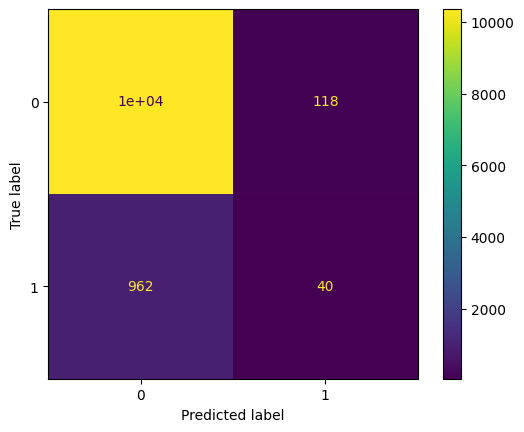

In [11]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

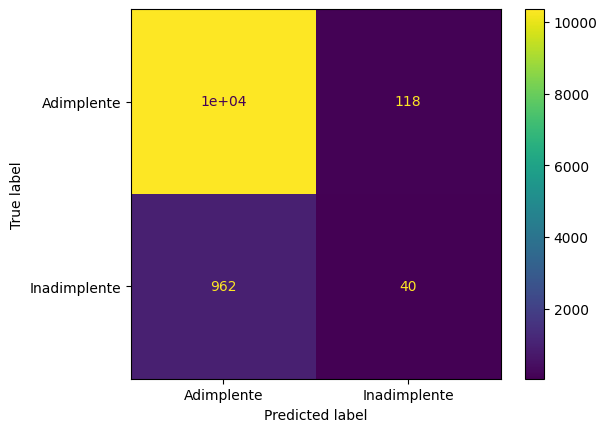

In [12]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [13]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

Acurácia: 0.9059315390645414
Precisão: 0.25316455696202533
Recall: 0.03992015968063872
F1-Score: 0.06896551724137931


Curva ROC

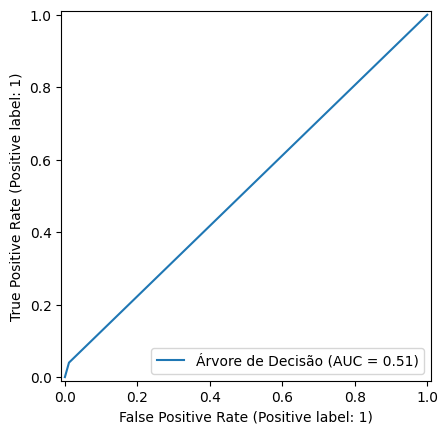

In [14]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [15]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5143297716048006


Curva de Precisão x Recall

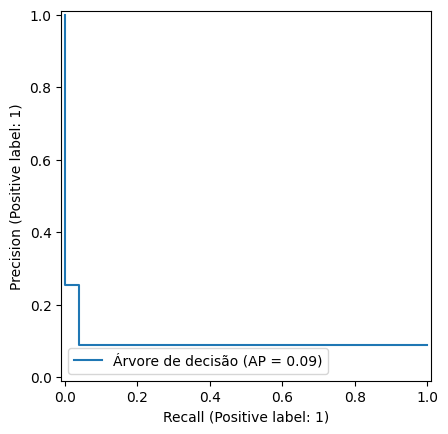

In [16]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [17]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09389698011339402


Relatório de Métricas

In [18]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



KFold

In [19]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.25198984, 0.25396371, 0.23815775, 0.24430776, 0.23773813]),
 'score_time': array([0.00456834, 0.00346851, 0.00344372, 0.00356412, 0.00351095]),
 'test_score': array([0.9127926 , 0.90733885, 0.9070122 , 0.91332753, 0.90004355])}

In [20]:
cv_resultados['test_score']

array([0.9127926 , 0.90733885, 0.9070122 , 0.91332753, 0.90004355])

In [21]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8984689861497763, 0.9177369026744124]


Validação Cruzada com Recall

In [22]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [23]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = "recall")
cv_resultados

{'fit_time': array([0.26274872, 0.24393773, 0.2430687 , 0.30362821, 0.35136342]),
 'score_time': array([0.00750136, 0.005867  , 0.00671101, 0.00871706, 0.00880289]),
 'test_score': array([0.03038309, 0.01856436, 0.01845018, 0.01697128, 0.02427746])}

In [24]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01173769996964484, 0.03172084727336677]


Estratificando os dados

In [25]:
dados['inadimplente'].value_counts(normalize = True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [26]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [27]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.021301045080387965, 0.03557237685789989]


Balanceamento de Dados

Oversampling

In [29]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [30]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


In [31]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [33]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7189699561713855, 0.7521602438422598]


Pipeline para Validação

In [37]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [38]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [39]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19704772711871263, 0.30831433588856316]


Undersampling

In [43]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])

In [44]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [45]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6230563892510225, 0.7014463364565563]


Testando o Modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.71      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



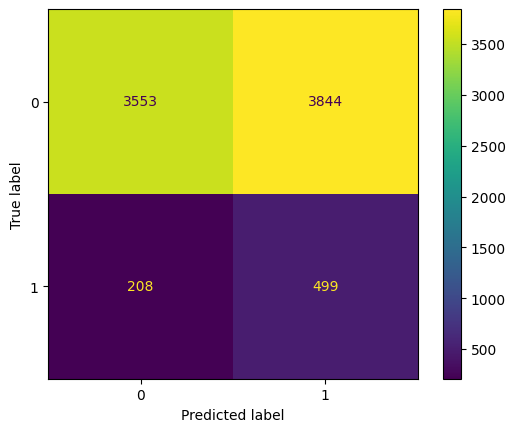

In [47]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)